<h1>SJU - DSS 740 - Machine Learning (Spring 2025)</h1>
<h2 style = 'color:yellow'>8. Natural Language Processing (NLP)</h2>
<h3 style = 'color:green'>8.0 Import Libraries</h3>

In [1]:
from textblob import TextBlob, Word
import nltk
from nltk.corpus import stopwords, wordnet
import re #for regex
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import spacy
from gensim import corpora, models

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('brown')

nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


<h3 style = 'color:green'>8.1 Load and Pre-Process Text</h3>

In [3]:
def cleanText(text):
    """
    Cleans the text by removing Project Gutenberg header/footer, stage directions, and other formatting.    
    
    Inputs:
    text (str)              : The text to be cleaned.

    Algorithm:
    - Removes Project Gutenberg header/footer.
    - Removes stage directions and other formatting by using regex to detect brackets and new lines.
    - Removes non-alphabetic characters and extra spaces.
    - Converts the text to lowercase.

    Outputs:
    cleaned_text (str)      : The cleaned text.

    """
    # Remove Project Gutenberg header/footer
    start = text.find("HAMLET")  # crude way to cut the fluff
    end = text.find("End of the Project Gutenberg")
    text = text[start:end]
    
    # Remove stage directions and other formatting
    text = re.sub(r"\[.*?\]", "", text) # Remove stage directions by looking for brackets
    text = re.sub(r"\r\n", " ", text) # Replaces new lines with spaces to make it easier to work with
    text = re.sub(r"[^A-Za-z\s]", "", text)  # Keep only letters and spaces
    text = re.sub(r"\s+", " ", text) # Remove extra spaces
    
    

    stop_words = set(stopwords.words("english"))
    ps = PorterStemmer()
    blob = TextBlob(text)
    cleaned_words = []
    for word in blob.words:
        if word not in stop_words and len(word) > 2 and wordnet.synsets(word):
            lemmatized = Word(word).lemmatize()
            stemmed = ps.stem(lemmatized)
            cleaned_words.append(stemmed)
    return " ".join(cleaned_words)

In [4]:
def analyzeTextblob(cleaned_text):
    """
    Analyzes the cleaned text using TextBlob.

    Inputs:
    cleaned_text (str)      : The cleaned text to be analyzed.

    Algorithm:
    - Creates a TextBlob object.
    - Extracts the first sentence and prints it.
    - Extracts and prints the top noun phrases.
    - Prints the sentiment of the first 5 sentences.
    - Prints the common words in the text.

    Outputs:
    blob (TextBlob)         : The TextBlob object containing the analyzed text.

    """
    blob = TextBlob(cleaned_text)
    print("\nSAMPLE SENTENCE:")
    print(blob.sentences[0])

    print("\nTOP NOUN PHRASES:")
    print(blob.noun_phrases[:10])

    print("\nSENTIMENT OF FIRST 5 SENTENCES:")
    for sentence in blob.sentences[:5]:
        print(f"{sentence[:60]}... => Sentiment: {sentence.sentiment}")

    print("\nCOMMON WORDS:")
    for word, count in blob.word_counts.items():
        if count > 100:
            print(f"{word}: {count}")

    return blob

In [5]:
def generateWordCloud(blob):
    """
    Generates a word cloud from the TextBlob object.

    Inputs:
    blob (TextBlob)         : The TextBlob object containing the analyzed text.

    Algorithm:
    - Creates a word cloud using the word frequencies from the TextBlob object.
    - Displays the word cloud using matplotlib.

    """

    word_freq = dict(blob.word_counts)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    plt.figure(figsize=(15, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud of Hamlet (Preprocessed)", fontsize=20)
    plt.show()

In [6]:
def loadHamlet():
    """
    Loads the Hamlet text from the Project Gutenberg website.

    Outputs:
    text (str)              : The raw text of Hamlet.

    """
    # Load the Hamlet text
    with open("../../Data/hamlet.txt", 'r') as file:
        hamlet_text = file.read()
        print("Loaded Hamlet text. Total characters:", len(hamlet_text))
        print("Data type of the original text:", type(hamlet_text))
        return hamlet_text

Loaded Hamlet text. Total characters: 197256
Data type of the original text: <class 'str'>
Analyzing with TextBlob...

SAMPLE SENTENCE:
hamlet princ denmark cover tragedi hamlet princ denmark shakespear content act scene platform castl scene room state castl scene iii room hous scene platform scene remot part castl act scene room hous scene room castl act iii scene room castl scene hall castl scene iii room castl scene anoth room castl act scene room castl scene anoth room castl scene iii anoth room castl scene plain denmark scene room castl scene anoth room castl scene vii anoth room castl act scene churchyard scene hall castl person hamlet princ denmark claudiu king denmark hamlet uncl ghost late king hamlet father queen hamlet mother wife claudiu lord chamberlain laert son daughter friend hamlet princ norway courtier courtier courtier courtier offic offic soldier courtier servant player gentleman courtier priest two clown gravedigg captain english ambassador lord ladi offic soldier 

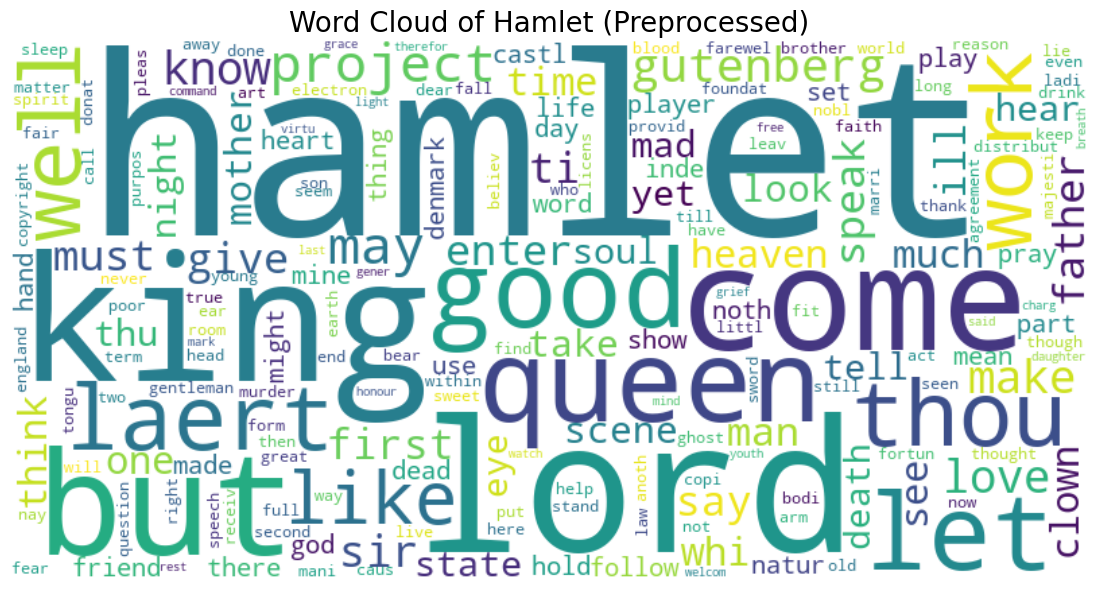

In [7]:
if __name__ == "__main__":
    rawHamletText = loadHamlet()
    cleaned_text = cleanText(rawHamletText)
    print("Analyzing with TextBlob...")
    blob = analyzeTextblob(cleaned_text)
    print("Generating word cloud...")
    generateWordCloud(blob)
    

<h3 style = 'color:green'>8.2 Additional NLP Techniques</h3>

In [8]:
# Removing NER tags using Spacy
doc = nlp("Hamlet was born in Denmark in 1601.")
for token in doc:
    if token.ent_type_ == "":
        print(token.text)

was
born
in
in
.


In [9]:
def tag_pos(sentence):
    """
    Tags each word in a sentence with its Part-of-Speech (POS) label.

    Inputs:
    sentence (str) : A natural language sentence.

    Output:
    A list of (word, POS tag) tuples.
    """
    doc = nlp(sentence)
    return [(token.text, token.pos_) for token in doc]

In [10]:
example = "Hamlet speaks to the ghost of his father at night."
pos_tags = tag_pos(example)

# Display the result
for word, pos in pos_tags:
    print(f"{word:>12} : {pos}")

      Hamlet : PROPN
      speaks : VERB
          to : ADP
         the : DET
       ghost : NOUN
          of : ADP
         his : PRON
      father : NOUN
          at : ADP
       night : NOUN
           . : PUNCT


In [11]:
def filter_pos(sentence, pos_list, mode="include"):
    """
    Filters the tokens in a sentence based on POS tags.
    
    Parameters:
    - sentence (str)       : Input sentence to process.
    - pos_list (list)      : List of POS tags to include or exclude.
    - mode (str)           : "include" to return only matching POS, "exclude" to remove them.
    
    Returns:
    - A list of (word, POS) tuples after applying the filter.
    """
    doc = nlp(sentence)
    if mode == "include":
        return [(token.text, token.pos_) for token in doc if token.pos_ in pos_list]
    elif mode == "exclude":
        return [(token.text, token.pos_) for token in doc if token.pos_ not in pos_list]
    else:
        raise ValueError("Mode must be 'include' or 'exclude'.")


In [12]:
sentence = "Hamlet speaks to the ghost of his father at night."

print("🎯 All POS:")
print(tag_pos(sentence))

🎯 All POS:
[('Hamlet', 'PROPN'), ('speaks', 'VERB'), ('to', 'ADP'), ('the', 'DET'), ('ghost', 'NOUN'), ('of', 'ADP'), ('his', 'PRON'), ('father', 'NOUN'), ('at', 'ADP'), ('night', 'NOUN'), ('.', 'PUNCT')]


In [13]:
print("\n✅ Included (only NOUN and PROPN):")
print(filter_pos(sentence, ["NOUN", "PROPN"], mode="include"))


✅ Included (only NOUN and PROPN):
[('Hamlet', 'PROPN'), ('ghost', 'NOUN'), ('father', 'NOUN'), ('night', 'NOUN')]


In [14]:
print("\n❌ Excluded (remove DET, ADP, PUNCT):")
print(filter_pos(sentence, ["DET", "ADP", "PUNCT"], mode="exclude"))


❌ Excluded (remove DET, ADP, PUNCT):
[('Hamlet', 'PROPN'), ('speaks', 'VERB'), ('ghost', 'NOUN'), ('his', 'PRON'), ('father', 'NOUN'), ('night', 'NOUN')]


<h3 style = 'color:green'>8.3 Sentiment Analysis</h3>

In [15]:
def plot_sentiment_scatter(text, max_sentences=200):
    """
    Plots polarity vs. subjectivity for the first N sentences in the text.
    
    Parameters:
    - text (str)             : Full input text (e.g., Hamlet)
    - max_sentences (int)    : Maximum number of sentences to plot
    
    Output:
    - Scatter plot of sentiment scores
    """
    blob = TextBlob(text)
    sentences = blob.sentences[:max_sentences]
    
    polarities = [s.sentiment.polarity for s in sentences]
    subjectivities = [s.sentiment.subjectivity for s in sentences]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(polarities, subjectivities, alpha=0.6, edgecolors='k')
    plt.axvline(0, color='grey', linestyle='--', linewidth=1)
    plt.axhline(0.5, color='grey', linestyle='--', linewidth=1)
    plt.title("📊 Sentiment Scatter Plot (Polarity vs Subjectivity)")
    plt.xlabel("Polarity (−1 = Negative, +1 = Positive)")
    plt.ylabel("Subjectivity (0 = Objective, 1 = Subjective)")
    plt.grid(True)
    plt.show()

Loaded Hamlet text. Total characters: 197256
Data type of the original text: <class 'str'>


c:\Users\Owner\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


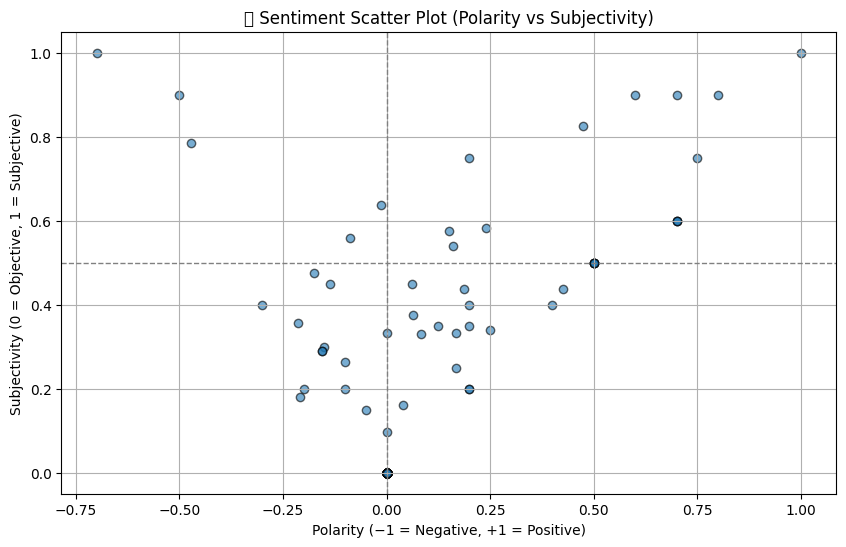

In [16]:
rawHamletText = loadHamlet()
cleaned_text = TextBlob(rawHamletText).raw
plot_sentiment_scatter(cleaned_text)

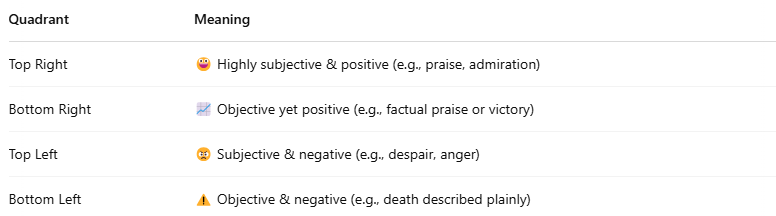

<h3 style = 'color:green'>8.4 Text Classification</h3>

In [17]:
# Additional libraries for text classification
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [18]:
# Sample Data
data = {
    'text': [
        "I love this book",
        "This movie was fantastic!",
        "What a terrible play",
        "I hated the ending",
        "It was a wonderful performance",
        "Awful experience, never again",
        "Absolutely brilliant dialogue",
        "The plot was boring",
        "Great acting and music",
        "Terrible characters and story"
    ],
    'label': ['pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg']
}
df = pd.DataFrame(data)
# df['label'] = df['label'].map({'pos': 1, 'neg': 0})  # Convert labels to binary
df

,text,label
0,I love this book,pos
1,This movie was fantastic!,pos
2,What a terrible play,neg
3,I hated the ending,neg
4,It was a wonderful performance,pos
5,"Awful experience, never again",neg
6,Absolutely brilliant dialogue,pos
7,The plot was boring,neg
8,Great acting and music,pos
9,Terrible characters and story,neg


In [19]:
# Train-test split and Vectorization
# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.3, random_state=42)

# 3. Text Vectorization
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [20]:
# 4. Support Vector Machine
model = LinearSVC()
model.fit(X_train_vec, y_train)

LinearSVC()

In [21]:
# 5. Evaluation
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

         neg       0.50      1.00      0.67         1
         pos       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [22]:
new_text = ["It was good"]
new_vec = vectorizer.transform(new_text)
print("Prediction:", model.predict(new_vec)[0])

Prediction: pos


In [23]:
new_text = ["It was boring"]
new_vec = vectorizer.transform(new_text)
print("Prediction:", model.predict(new_vec)[0])

Prediction: neg
